I intentionaly didn't clean it. Here is how messy I can be.


LOG
====
~~road, is it ANY different from M1? Yes it is~~
* closure_type ANY of them are not Planned works?
* traffic_managment Carrigeway Closure, anything else?
* Is status of ANY of them not Firm? Yes, some of them are provisional
* What is the region, in which the works are preformed, like literaly, it all should be in some rectengular between some max and min (easting,northing)
* Whay is the most busy period?
* What is the longest road?
* What is the oldest road? Is it the most broken one?
* What is the buisest period? On which road?
* Which roads (parts) would be completely unavaliable during which period?

Map can help to understand, what is going on.

24/7 works must have special treatment.
 
About coordinates
--------------------------

It seems, that coordinate system, used in file is called
"projected coordinates".

https://epsg.io/map#srs=27700&x=429658.028069&y=270007.666355&z=11&layer=streets

About reasons
--------------------------

http://www.telford.gov.uk/info/20048/roadworks_closures_and_restrictions/1032/dual_carriageway_maintenance_2018


Rants
-----------------------

How to group data? By date probably. What are the time bounds?
What is the most broken road?


In [69]:
%load_ext pycodestyle_magic
import pandas as pd
import xml.etree.ElementTree as ET
import datetime as datetime
import numpy as np

The pycodestyle_magic extension is already loaded. To reload it, use:
  %reload_ext pycodestyle_magic


Pandas by default can't read the xml, python std can convert it into dictionary.
Data seems to have fixed fields, and can be represented as table.

In [70]:
rawXML = ET.parse('./he_roadworks_2016_02_29.xml')

In [71]:
rawROOT = rawXML.getroot()

'''
Here I perform initial analysis to answer the
question if the data files have unified structure.
If some tags are unique to certain xml entries,
measures need to be taken.  If the file structure is
unified, I get the header here.
'''
header = [entry.tag for entry in rawROOT[0]]
print(header)

['reference_number', 'road', 'local_authority', 'location', 'start_date', 'end_date', 'expected_delay', 'description', 'traffic_management', 'closure_type', 'centre_easting', 'centre_northing', 'status', 'published_date']


In [72]:
xmlList = []
#xmlList.append(header)

# this xml has no attributes, just tags with values.
# xml was an overkill for this purpose, they should
# have stored in csv, would have saved space:)
for child in rawROOT:
    # couple of lists to absorb the data and check for
    # unique values.
    lineList = []
    headerList = [entry.tag for entry in child]   

    # if some entry have unique tags, notify me
    if headerList != header:
        print('Unique tags')        
        # print the 'reference_number' and unique tags
        print('reference_number: ',child.find('reference_number').text)
        print(headerList)
        print(set(header)-set(headerList))

    for sub in child:
        lineList.append(sub.text)
    xmlList.append(lineList)


Now I create Pandas DataFrame
I use this instrument due to it's powerfull data manipulation and sorting analysis.
I can always go back to std python data structures.


In [73]:
roadWorks = pd.DataFrame(xmlList, columns=header).set_index('reference_number')
roadWorks[roadWorks['local_authority']!='None']

,road,local_authority,location,start_date,end_date,expected_delay,description,traffic_management,closure_type,centre_easting,centre_northing,status,published_date
reference_number,,,,,,,,,,,,,
1535363,M1,Leicestershire,Jct 19 - 24 (999932),2016-03-14T08:30:00,2016-04-21T05:00:00,Slight (less than 10 mins),Mobile hard shoulder closures north and southb...,Mobile Lane Closure,Planned Works,453356,303840,Firm,2015-08-03T13:12:19
1535380,M1,Derbyshire / Leicestershire / Nottinghamshire,Jct 24 - 27 (999932),2016-01-04T08:45:00,2016-03-08T05:00:00,Slight (less than 10 mins),"Hardshoulder or lane 3,4 closure northbound or...",Lane Closure,Planned Works,449435,340946,Firm,2016-02-26T09:04:26
1824563,M1,Leeds / Wakefield / West Yorkshire,Jct 42 to Jct 41,2013-07-09T08:30:00,2016-03-19T15:30:00,Moderate (10 - 30 mins),M1 Jct 39 to Jct 42 Managed Motorway Scheme wi...,Lane Closure,Planned Works,432198,426074,Firm,2016-02-26T14:09:53
2289039,M1,Barnsley / Rotherham / Sheffield / South Yorks...,Jct 34 to Jct 36,2014-12-11T19:52:00,2017-02-28T06:00:00,Moderate (10 - 30 mins),M1 Jct 32 to Jct 35a Managed Motorway Scheme w...,Lane Closure,Planned Works,436947,395240,Firm,2016-02-19T02:47:28
2289061,M1,Barnsley / Rotherham / Sheffield / South Yorks...,Jct 36 to Jct 34,2014-04-30T21:19:00,2017-02-28T00:00:00,Moderate (10 - 30 mins),M1 Jct 32 to Jct 35a Managed Motorway Scheme w...,Lane Closure,Planned Works,436353,397090,Firm,2016-02-19T02:42:02
2544421,M1,Barnsley / Wakefield,Jct 38,2016-02-21T20:53:00,2016-03-16T06:00:00,Moderate (10 - 30 mins),M1 J38 NB Entry Slip Filter Drain Renewal (391...,Carriageway Closure,Planned Works,429705,412486,Firm,2016-02-25T08:55:08
2707345,M1,Leicestershire,Jct 21 to Leicester Forest East Services (200239),2015-05-20T09:52:00,2016-06-21T06:00:00,Slight (less than 10 mins),Current works have 24/7 hardshoulder closure w...,Carriageway Closure,Planned Works,454322,301645,Firm,2016-02-27T02:58:45
2719363,M1,Rotherham,Jct 33 to Jct 32,2014-11-26T20:02:00,2017-02-28T06:00:00,Slight (less than 10 mins),M1 Jct 32 to Jct 35a Managed Motorway Scheme w...,Lane Closure,Planned Works,445466,389308,Firm,2016-01-28T09:40:24
2719364,M1,Rotherham / Sheffield / South Yorkshire,Jct 35 to Jct 33,2014-12-09T19:54:00,2017-02-28T06:00:00,Moderate (10 - 30 mins),M1 Jct 32 to Jct 35a Managed Motorway Scheme w...,Lane Closure,Planned Works,439706,391114,Firm,2016-02-25T15:44:12


Data file "./he_roadworks_2016_02_29" contains 2196 data entries with unique ref numbers.

Now some refactoring.

In [74]:
def read_roadworks_xml(filename):
    """Read and process roadworks xml file.

    Args:
        filename: string with path to .xml file

    Returns:
        pandas.DataFrame
    """

    rawXML = ET.parse(filename)
    rawROOT = rawXML.getroot()
    xmlList = []

    # this xml has no attributes, just tags with values.
    # xml was an overkill for this purpose, they should
    # have stored in csv, would have saved space:)
    for child in rawROOT:
        # couple of lists to absorb the data and check for
        # unique values.
        lineList = []
        headerList = [entry.tag for entry in child]

        # if some entry have unique tags, notify me
        if headerList != header:
            print('Unique tags')

            # print the 'reference_number' and unique tags
            print('reference_number: ', child.find('reference_number').text)
            print(headerList)
            print(set(header) - set(headerList))

        for sub in child:
            lineList.append(sub.text)
        xmlList.append(lineList)

    roadWorks = pd.DataFrame(xmlList, columns=header)\
                    .set_index('reference_number')
    return roadWorks


d0209 = read_roadworks_xml('./he_roadworks_2016_02_29.xml')
d0307 = read_roadworks_xml('./he_roadworks_2016_03_07.xml')

# While d0307 is structuraly the same to d0209, the two have
# overlapping rows.
# An important question, did status of any work changed during
# this few days?

roadWorks = pd.concat([d0209, d0307], join='outer', axis=0)\
              .drop_duplicates()

# inner: 3644
# outer: 3644
# same, seems reasonable

roadWorks[['start_date', 'end_date']] = roadWorks[['start_date', 'end_date']]\
                                     .astype('datetime64')



In [75]:
''' ['reference_number', 'road', 'local_authority', 'location', 
'start_date', 'end_date', 'expected_delay', 'description', 
'traffic_management', 'closure_type', 'centre_easting', 
'centre_northing', 'status', 'published_date']'''

# Either "Firm" or "provisional"
set(roadWorks['status'].tolist())

# Either "Firm" or "provisional"
set(roadWorks['closure_type'].tolist())



''' traffic_managment
{'Carriageway Closure', |
 'Contraflow', # -> <-
 'Convoy Working', 
 'Lane Closure', 
 'Lane Closure with Switching',
 'Mobile Lane Closure',
 'None',
 'Other',
 'Speed Restriction',
 'Stop/Go Boards',
 'To Be Advised', ? what
 'Traffic Signals',
 'Weight Restriction',
 'Width Restriction'}'''
set(roadWorks['traffic_management'])

''' this data is to be brought to categorical type
{'Moderate (10 - 30 mins)',
 'No Delay', lowest
 'Severe (more than 30 mins)', highest
 'Slight (less than 10 mins)'}'''
set(roadWorks['expected_delay'])

# TODO start with dates
# than apply categorical conversions

# Either 'Emergency Works', 'Planned Works'
set(roadWorks['closure_type'].tolist())

localAuth=set(roadWorks['local_authority'])


In [76]:
# 132 roads are affected
roads=set(roadWorks['road'].tolist())

In [77]:
roadWorks['expected_delay']=\
roadWorks['expected_delay'].astype('category',
                            categories=['No Delay', 'Slight (less than 10 mins)',
                            'Moderate (10 - 30 mins)','Severe (more than 30 mins)'],
                            ordered=True)


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: specifying 'categories' or 'ordered' in .astype() is deprecated; pass a CategoricalDtype instead
  after removing the cwd from sys.path.


In [78]:
# 2196 

from datetime import datetime


def firm_provisonal(status):
    if status=='Provisional':
        return 'expected'
    else:
        return 'confirmed'
    
def expected_delay(delay):
    if delay=='No Delay':
        return delay
    else:
        return delay+' delay'
    

    
def user_view(date):
       '''Print human readable data on road delays for trevalers.
       
           Args:
               date: the date of interese
       
           Returns:
               nothing yet
       '''    
       user_columns=['road','expected_delay','description','traffic_management','closure_type','status']
       #if type=tuple define limits
       #if sinle date, do something else
       
       htlm_data = ''
       
       # create a user view, with only human readable information
       userView = roadWorks[(roadWorks['start_date']<=date) & (date<=roadWorks['end_date'])][user_columns]\
                  .sort_values(by=['expected_delay'],ascending = False)
    
       # https://english.stackexchange.com/questions/140516/plural-singular-with-certain-numbers
       # Some situation string do not have points in the end., some have ' .' situation.
       engl=lambda x: ('is','') if x==1 else ('are','s')
       
       v,s=engl(len(userView))
       print('There {v} {l} roadwork situation{s} on {d}.\n'.format(v=v,s=s,
                                                                 l=len(userView), d=date))
    
       for i,x in userView.iterrows():
           
           if x['expected_delay'] == 'No Delay':
               print('Please be carefull on {r}.\nSituation: {rs}\nReason: {c}\n'.format(s=firm_provisonal(x['status']),
                                                                           d=expected_delay(x['expected_delay']),
                                                                           r=x['road'],rs=x['description'],
                                                                                       c=x['closure_type']))
           # No delay case has a "delay" in description.
           else:
               print('{d} is {s} on {r}.\nSituation: {rs}\nReason: {c}\n'.format(s=firm_provisonal(x['status']),
                                                                    d=expected_delay(x['expected_delay']),
                                                                    r=x['road'],rs=x['description'],
                                                                    c=x['closure_type']))

date=(('2011-01-17 20:14:00'))
user_view(date)    
    #print(roadWorks.iloc[0]['start_date']<s<roadWorks.iloc[0]['end_date'])
    
    

There is 1 roadwork situation on 2011-01-17 20:14:00.

Slight (less than 10 mins) delay is confirmed on M62.
Situation: Lane 1 and 2 closed eastbound for installation of varioguard followed by 24 hrs hardshoulder closure.
Reason: Planned Works



In [79]:
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets


In [80]:
start_max = roadWorks.loc[roadWorks['start_date'].idxmax()]['start_date']

start_min = roadWorks.loc[roadWorks['start_date'].idxmin()]['start_date']

end_max = roadWorks.loc[roadWorks['end_date'].idxmax()]['end_date']

end_min = roadWorks.loc[roadWorks['end_date'].idxmin()]['end_date']

print(start_min) # too early
print(start_max) # obvious

print(end_min)   # obvious
print(end_max)   # reasonable

from string import Template
from math import floor



type(start_min)

#print(np.sort(roadWorks['start_date']))
#print(np.sort(roadWorks['end_date']))

longestWork = (roadWorks['end_date'] - roadWorks['start_date']).max()
shortestWork = (roadWorks['end_date'] - roadWorks['start_date']).min()


longestWorkEntry = roadWorks.loc[(roadWorks['end_date'] - roadWorks['start_date']).idxmax()]
longestWorkEntry = roadWorks.loc[(roadWorks['end_date'] - roadWorks['start_date']).idxmin()]

lString = "The longest road work in dataset takes " + str(longestWork) + ' h:m:s.'
sString = "While the shortest road work in dataset takes " + str(shortestWork)+' h:m:s.\n'

print(lString,sString)

#roadWorks.loc[(roadWorks['end_date'] - roadWorks['start_date']).idxmax()]
#roadWorks.iloc[0]['end_date']-roadWorks.iloc[0]['start_date']


2011-01-17 20:14:00
2016-03-22 00:00:00
2016-02-29 05:00:00
2018-04-30 05:00:00
The longest road work in dataset takes 2174 days 09:46:00 h:m:s. While the shortest road work in dataset takes 0 days 01:00:00 h:m:s.



3644


C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\figure.py:459: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


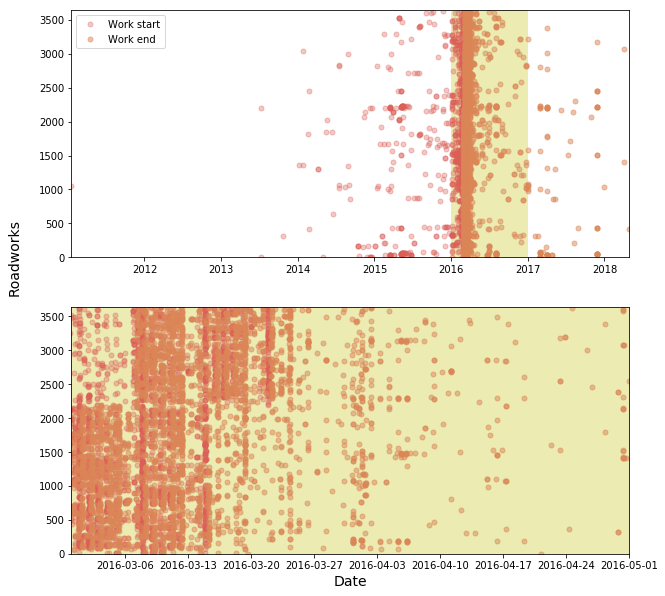

In [81]:
import matplotlib.pyplot as plt
y = range(len(roadWorks))

print(len(roadWorks))


#major_ticks = np.arange(0, 3644, 100)
minor_ticks = np.arange(0, 3644, 100)

(fig, axs) = plt.subplots(2,1, figsize=(10,10),  sharey=True)


#axs.set_yticks(minor_ticks, minor=True)

#axs.grid(which='both',alpha=0.2)
#axs.ylim((0, 3644))
#ax.grid(which='minor', alpha=0.2)
#ax.grid(which='major', alpha=0.5)



axs[0].set_ylim([ 0, len(roadWorks)])
axs[0].set_xlim([ start_min, end_max])
axs[0].plot(roadWorks['start_date'],y, marker='o',linestyle='None', alpha = 0.35, markersize = 5, label='Work start')
axs[0].plot(roadWorks['end_date'],y, marker='o',linestyle='None', alpha = 0.5, markersize = 5,   label='Work end')  
axs[0].axvspan(('2016-01-01'), ('2016-12-31'), color='y', alpha=0.3, lw=0)
axs[0].legend(loc='upper left')

axs[1].set_xlim([pd.Timestamp('2016-02-29'), pd.Timestamp('2016-05-1')])
#axs[1].axes(('2016-01-01'), ('2016-12-31'))
axs[1].axvspan(pd.Timestamp('2016-01-01'), pd.Timestamp('2016-12-31'), color='y', alpha=0.3, lw=0)
#axs[1].axvspan(pd.Timestamp('2016-02-29'), pd.Timestamp('2016-05-1'), color='tab:green', alpha=0.2, lw=0)
axs[1].plot(roadWorks['start_date'],y, marker='o',linestyle='None', alpha = 0.35, markersize = 5)
axs[1].plot(roadWorks['end_date'],y, marker='o',linestyle='None', alpha = 0.5, markersize = 5)
axs[1].set_ylabel('Roadworks', fontsize=14)
axs[1].set_xlabel('Date', fontsize=14)
axs[1].yaxis.set_label_coords(-0.09, 1.2)
fig.show()
fig.savefig('date distribution.png', bbox_inches='tight',dpi = 150)

In [82]:
# Time min and max
from ipywidgets.embed import embed_minimal_html



start_date = start_min
end_date = end_max

dates = pd.date_range(start_date, end_date, freq='D')

options = [(date.strftime(' %d %b %Y '), date) for date in dates]
index = (0, len(options)-1)

selection_range_slider = widgets.SelectionSlider(
    options=options,
    #index=index,
    description='Dates',
    orientation='horizontal',
    layout={'width': '800px'}
)

#selection_range_slider
#interact(f, x=datetime.datetime(2016,3,15,12,0));

def print_date_range(date_range):
    user_view(date_range)

w=widgets.interactive(
    print_date_range,
    date_range=selection_range_slider
);


out = widgets.interactive_output(
    print_date_range,{'date_range' : selection_range_slider })

display(selection_range_slider)
display(out)
#embed_minimal_html('export.html', views=[selection_range_slider,out], title='Widgets export')


SelectionSlider(description='Dates', layout=Layout(width='800px'), options=((' 17 Jan 2011 ', Timestamp('2011-…

Output()

Context
-----------

I assume it is 2016 and it is around March,
since the "newest" raw data file is dated 
of March 2016.


The busiest day
------------------------

Here I determine the day in 2016 with the
highest ammount of roadwork situations.
I assume, in this context this information
may be interesting.

The busiest places
---------------------------

Here I determine two things: the city in UK
with the most ammount of roadworks in 2016.
And second, the city with the highest amount
of roadworks per day. This information may be
important, since such place is better to be avoid
by the drivers, who may choose another mean of 
transport during either 2016 or a specific date.

In [83]:
header

['reference_number',
 'road',
 'local_authority',
 'location',
 'start_date',
 'end_date',
 'expected_delay',
 'description',
 'traffic_management',
 'closure_type',
 'centre_easting',
 'centre_northing',
 'status',
 'published_date']

In [84]:
from datetime import datetime

date_min = datetime.strptime('29 Mar 2016  11:59PM', '%d %b %Y %I:%M%p')
date_max = datetime.strptime('29 Apr 2016  11:59PM', '%d %b %Y %I:%M%p')
# 3254865
# 623

print(date_min)
print(date_max)

print(len(roadWorks[((roadWorks['start_date']<=date_min) & (roadWorks['end_date']>=date_min))]))
roadWorks[((roadWorks['start_date']<=date_min) & (roadWorks['end_date']>=date_min))]

2016-03-29 23:59:00
2016-04-29 23:59:00
640


,road,local_authority,location,start_date,end_date,expected_delay,description,traffic_management,closure_type,centre_easting,centre_northing,status,published_date
reference_number,,,,,,,,,,,,,
1535363,M1,Leicestershire,Jct 19 - 24 (999932),2016-03-14 08:30:00,2016-04-21 05:00:00,Slight (less than 10 mins),Mobile hard shoulder closures north and southb...,Mobile Lane Closure,Planned Works,453356,303840,Firm,2015-08-03T13:12:19
2289039,M1,Barnsley / Rotherham / Sheffield / South Yorks...,Jct 34 to Jct 36,2014-12-11 19:52:00,2017-02-28 06:00:00,Moderate (10 - 30 mins),M1 Jct 32 to Jct 35a Managed Motorway Scheme w...,Lane Closure,Planned Works,436947,395240,Firm,2016-02-19T02:47:28
2289061,M1,Barnsley / Rotherham / Sheffield / South Yorks...,Jct 36 to Jct 34,2014-04-30 21:19:00,2017-02-28 00:00:00,Moderate (10 - 30 mins),M1 Jct 32 to Jct 35a Managed Motorway Scheme w...,Lane Closure,Planned Works,436353,397090,Firm,2016-02-19T02:42:02
2707345,M1,Leicestershire,Jct 21 to Leicester Forest East Services (200239),2015-05-20 09:52:00,2016-06-21 06:00:00,Slight (less than 10 mins),Current works have 24/7 hardshoulder closure w...,Carriageway Closure,Planned Works,454322,301645,Firm,2016-02-27T02:58:45
2719363,M1,Rotherham,Jct 33 to Jct 32,2014-11-26 20:02:00,2017-02-28 06:00:00,Slight (less than 10 mins),M1 Jct 32 to Jct 35a Managed Motorway Scheme w...,Lane Closure,Planned Works,445466,389308,Firm,2016-01-28T09:40:24
2719364,M1,Rotherham / Sheffield / South Yorkshire,Jct 35 to Jct 33,2014-12-09 19:54:00,2017-02-28 06:00:00,Moderate (10 - 30 mins),M1 Jct 32 to Jct 35a Managed Motorway Scheme w...,Lane Closure,Planned Works,439706,391114,Firm,2016-02-25T15:44:12
2719367,M1,Rotherham / South Yorkshire,Jct 32 to Jct 33,2014-12-17 20:00:00,2017-02-28 06:00:00,Slight (less than 10 mins),M1 Jct 32 to Jct 35a Managed Motorway Scheme w...,Lane Closure,Planned Works,445728,389272,Firm,2016-01-19T09:06:44
2719372,M1,Rotherham / Sheffield / South Yorkshire,Jct 33 to Jct 34,2014-12-18 20:34:00,2017-02-28 06:00:00,Moderate (10 - 30 mins),M1 Jct 32 to Jct 35a Managed Motorway Scheme w...,Lane Closure,Planned Works,440679,389914,Firm,2016-02-26T20:02:21
3028960,M1,Rotherham / South Yorkshire,Jct 32,2014-10-20 20:12:00,2016-07-31 06:00:00,Slight (less than 10 mins),M1 Jct 32 to Jct 35a Managed Motorway Scheme w...,Carriageway Closure,Planned Works,447912,388932,Firm,2015-06-26T07:41:24


In [85]:
from IPython.display import display, HTML
from datetime import datetime
date_min = datetime.strptime('Mar 30 2016  11:59PM', '%b %d %Y %I:%M%p')
date_max = datetime.strptime('Apr 15 2016  11:59PM', '%b %d %Y %I:%M%p')

# 623

print(date_min)
print(date_max)

busyView = roadWorks[((roadWorks['start_date']<=date_min) & (roadWorks['end_date']>=date_min))]
                    #((roadWorks['start_date']<=date_min) & (roadWorks['end_date']>=date_min))]
                    #| ((roadWorks['start_date']>=date_min) & (roadWorks['end_date']<=date_max))
                    #| ((roadWorks['start_date']>=date_min) & (roadWorks['start_date']<=date_max))
                    #]

print(len(busyView),len(roadWorks))
# convert / separated strings into ist
la = lambda x: x.replace(' / ','/').split('/')
auth = busyView['local_authority'].astype(str).apply(la)

# I would require to change the index of the data
# to estimate.
conversion_list = []

city_header = ['local_authority', 'road', 'reference_number', 
          'start_date', 'end_date', 'expected_delay',
          'centre_easting', 'centre_northing']

for i,d in busyView.reset_index()[city_header].drop(columns=['local_authority']).iterrows():
     for c in auth.reset_index().loc[i]['local_authority']:        
        conversion_list.append([c]+d.tolist())


laWorks = pd.DataFrame(conversion_list, columns=city_header)

# some works do not have local authorities
uniqueRegions = list(set(laWorks['local_authority']))

laWorks = laWorks.set_index(['local_authority'])

works_count = laWorks.index.value_counts()

max_region = works_count.idxmax()
max_works = works_count.max()


#display(HTML(pd.DataFrame(works_count, columns = ['Region', 'Works']).to_html()))
#works_count.idxmax()

#display(HTML(works_count[0:10].to_frame(name='Number of works by region').to_html()))#.rename(columns = ['Region', 'Works'])#[0:10], columns = ['Region', 'Works'])
works_count = works_count.reset_index().rename(columns={'local_authority':'Of works', 'index' : 'Region'})\
                         .set_index('Of works')

ten_most_loaded = works_count\
                .groupby(works_count.index)\
                .agg(lambda x: ', '.join(str(i) for i in x)).iloc[::-1]\
                .reset_index().set_index('Region')

#print('According to our data there are {0} works in 2016 in {1} regions of UK.'.format(len(busyView), len(uniqueRegions)-1))
#print('Most of the works ({0}) will take place on the roads of the County of {1}.\n'.format(max_works,max_region))
#print('Ten most busy administrative regions of UK in 2016 are given in the table below.')
display(HTML((ten_most_loaded[0:10]).to_html()))#

#laWorks





2016-03-30 23:59:00
2016-04-15 23:59:00
623 3644


,Of works
Region,
Surrey,56
Essex,47
Northamptonshire,46
Cambridgeshire,44
Hampshire,34
Leicestershire,33
Derbyshire,27
Warwickshire,25
Cheshire,23


In [86]:
'''Longest road'''

roadsView = split_local_authority(roadWorks, header = ['reference_number', 'local_authority','road'])

laRoads.drop_duplicates().groupby('road')\
.count().sort_values(by=['Region'],ascending=False)

# This data doesn't give us the correct answer, but gives
# us a clue abot the longest road in UK - A1. The "prediction"
# can be imporved using the number of junctions or the area
# of the crossed regions.

# I downloaded some open data on area and population of large
# administative areas of UK and stored it as csv, now I will
# merge the datasets and try to estimate the length.

area_pop = pd.read_csv('./Counties_area_pop.csv',header=0)
roads_area = pd.merge(roadsView, area_pop[['Name','Area km2']],
         left_on = 'local_authority',   right_on='Name')

roads_area = roads_area.drop(columns = ['Name'])

roads_area['Area km2'] = roads_area['Area km2']\
                         .apply(lambda x: x**0.5)

roads_area = roads_area.rename(columns = {'Area km2' : 'Approx Length, km'})

roads_area.drop_duplicates().groupby('road').sum().sort_values(by='Approx Length, km', ascending=False)

"""
    I do obtain the right value for the A1, 
    but the inaccuracy of this method is obviously too big.
    All other roads are ordered wrongly and the length values are ~40-50
    percent wrong.
"""
roads_area.drop_duplicates().groupby('road').sum().sort_values(by='Approx Length, km', ascending=False)

laRoads.drop_duplicates().groupby('road').count().sort_values(by='Region', ascending=False)

NameError: name 'split_local_authority' is not defined

In [87]:
roadWorks['Derbys'roadWorks['local_authority']  'Derbyshire']

SyntaxError: invalid syntax (<ipython-input-87-07526f40075e>, line 1)

In [88]:
def process_roadworks_data(data):
    """Reformat and clean roadworks DataDrame.

    Args:
        data: DataFrame containing xml information

    Returns:
        nothing
    """
    data[['start_date', 'end_date']] = data[['start_date', 'end_date']]\
                                          .astype('datetime64')

    # convert / separated strings into list
    # I use array, because it would be easier to flatten next
    if type(data['local_authority'] != np.ndarray):
       data['local_authority'] = data['local_authority']\
                            .astype(str)\
                            .apply(lambda x: np.array(x.replace(' / ', '/').split('/')))

    # minimal string cleanup, more can be done
    data[['location', 'closure_type']] = \
    data[['location', 'closure_type']].apply(lambda x : x.str.strip())

def split_local_authority(data, header = None):
    """Function to get DataFrame, splited by local authority entries.
    
    Keyword args:
        header: if header is given, it MUST contain the index name, among others
    Args:
        data: DataFrame containing xml information

    Returns:
        nothing
    """
    conversion_list = []                                                           
    
    aList = data['local_authority'].values
    
    conversion_list = []

    if header == None:
        header = data.reset_index().columns.tolist()
    
        
    rh = header
    rh.remove('local_authority')

    # TODO refactor into function
    for i,d in data.reset_index()[rh].iterrows():
         for c in aList[i]:
             conversion_list.append([c]+d.tolist())
    
    #print(conversion_list)
    print(len(rh))
    splited = pd.DataFrame(conversion_list, columns=['local_authority']+rh)\
              .set_index(data.index.names)
    return splited
#process_roadworks_data(roadWorks)

def read_roadworks_xml(filename):
    """Read and process roadworks xml file.

    Args:
        filename: string with path to .xml file

    Returns:
        pandas.DataFrame
    """

    rawXML = ET.parse(filename)
    rawROOT = rawXML.getroot()
    xmlList = []

    # get header from first entry
    header = [entry.tag for entry in rawROOT[0]]

    '''Header columns:
    'reference_number', 'road', 'local_authority',
    'location', 'start_date', 'end_date',
    'expected_delay', 'description', 'traffic_management',
    'closure_type', 'centre_easting', 'centre_northing',
    'status', 'published_date'
    '''
    
    # this xml has no attributes, just tags with values.
    # xml was an overkill for this purpose, they should
    # have stored in csv, would have saved space:)
    for child in rawROOT:
        # couple of lists to absorb the data and check for
        # unique values.
        lineList = []
        headerList = [entry.tag for entry in child]

        # if some entry have unique tags, notify me
        if headerList != header:
            print('Unique tags')

            # print the 'reference_number' and unique tags
            print('reference_number: ', child.find('reference_number').text)
            print(headerList)
            print(set(header) - set(headerList))

        for sub in child:
            lineList.append(sub.text)
        xmlList.append(lineList)

    roadWorks = pd.DataFrame(xmlList, columns=header)\
                    .set_index('reference_number')
    return roadWorks




d0209 = read_roadworks_xml('./he_roadworks_2016_02_29.xml')
d0307 = read_roadworks_xml('./he_roadworks_2016_03_07.xml')

# While d0307 is structuraly the same to d0209, the two have
# overlapping rows.
# An important question, did status of any work changed during
# this few days?

roadWorks = pd.concat([d0209, d0307], join='outer', axis=0)\
              .drop_duplicates()

# inner: 3644
# outer: 3644
# same, seems reasonable

#roadWorks[['start_date', 'end_date']] = roadWorks[['start_date', 'end_date']]\
#                                     .astype('datetime64'

process_roadworks_data(roadWorks)
#roadWorks
split_local_authority(roadWorks, header = ['reference_number', 'local_authority','road'])
#roadWorks
#type(roadWorks['local_authority'][0])

2


,local_authority,road
reference_number,,
1535363,Leicestershire,M1
1535380,Derbyshire,M1
1535380,Leicestershire,M1
1535380,Nottinghamshire,M1
1824563,Leeds,M1
1824563,Wakefield,M1
1824563,West Yorkshire,M1
2289039,Barnsley,M1
2289039,Rotherham,M1


In [89]:
u
# Now I want to estimate an average delay in regions.

# First I will drop No Delay values
laWorks[laWorks['expected_delay']=='No Delay']


# I replace them with the values based on delay range, provided.
# The delay values can be improved with better statistics.
# I astimated 'Severe delay' time as a median value
# between 30 min and 120 min (two hours) delay.
delay = {
    'Slight (less than 10 mins)' : 5,
    'Moderate (10 - 30 mins)' : 20,
    'Severe (more than 30 mins)' : 75
        }
laDelay = laWorks['expected_delay'].map(delay)
laDelay = laDelay.dropna()
delayTable = laDelay.groupby(laDelay.index)\
                    .agg(np.sum)\
                    .sort_values(ascending = False)\
                    .to_frame()

delayTable['expected_delay']=delayTable['expected_delay'].astype(int)



#delayTable.reset_index()

#delayTable = delayTable.groupby(['expected_delay'])\
#.agg(lambda x: ', '.join(str(i) for i in x)).iloc[::-1]
#             .reset_index().set_index('local_authority')

delayTable=delayTable.reset_index().set_index('expected_delay')

delayTable = delayTable.groupby(['expected_delay'])\
                 .agg(lambda x: ', '.join(str(i) for i in x))\
                 .reset_index()
                 
delayTable.rename(columns={\
                 'expected_delay' : 'Total delay in minutes',\
                 'local_authority' : 'Region'}, inplace=True)\
  
#

delayTable=delayTable.set_index('Region')\
            .sort_values(by=['Total delay in minutes'],ascending=False)

delayTable[delayTable['Total delay in minutes']>120]
#soos
#ten_most_loaded = works_count\
#                .groupby(works_count.index)\
# #               .agg(lambda x: ', '.join(str(i) for i in x)).iloc[::-1]\
#                .reset_index().set_index('Region')

#Ports:
#http://www.ukports.com/ports-directory.php
#delayTable[delayTable['expected_delay']>10]

#laWorks=laWorks['expected_delay'].map(delay)

#laWorks['expected_delay']=laWorks['expected_delay'].map(delay)#['expected_delay']

#set(uniqueTowns)
#laWorks
#print(laWorks.index.value_counts())

# I found this data here:
# https://www.citypopulation.de/php/uk-admin.php

NameError: name 'u' is not defined

Map view
-------------

Data contains, besides all the datetime and
string information, also coordinates, I can 
add this data to make the location of the 
roadworks clear.

In [90]:
# I needed this on windows
# https://gis.stackexchange.com/questions/259902/gdal-importerror-dll-load-failed-the-specified-module-could-not-be-found
import geopandas as gp
gb=gp.read_file('./roads.shp')



#gb = gb[gb['type']=='primary']
#roadsMap = gb[gb['ref'].isin(roads)]

#roadsMap.to_file(driver = 'ESRI Shapefile', filename= "slim_roads.shp")
# or directly
#roadsMap.to_file("slim_roads.shp")


#gb=gb[gb['SOVEREIGNT']=='United Kingdom']

In [91]:
#roadsMap2=gp.read_file('./slim_roads.shp')
roadsMap = gb[gb['ref'].isin(roads)]
roadsMap.to_file("slim_roads.shp")

C:\ProgramData\Anaconda3\lib\site-packages\geopandas\io\file.py:108: FionaDeprecationWarning: Use fiona.Env() instead.
  with fiona.drivers():


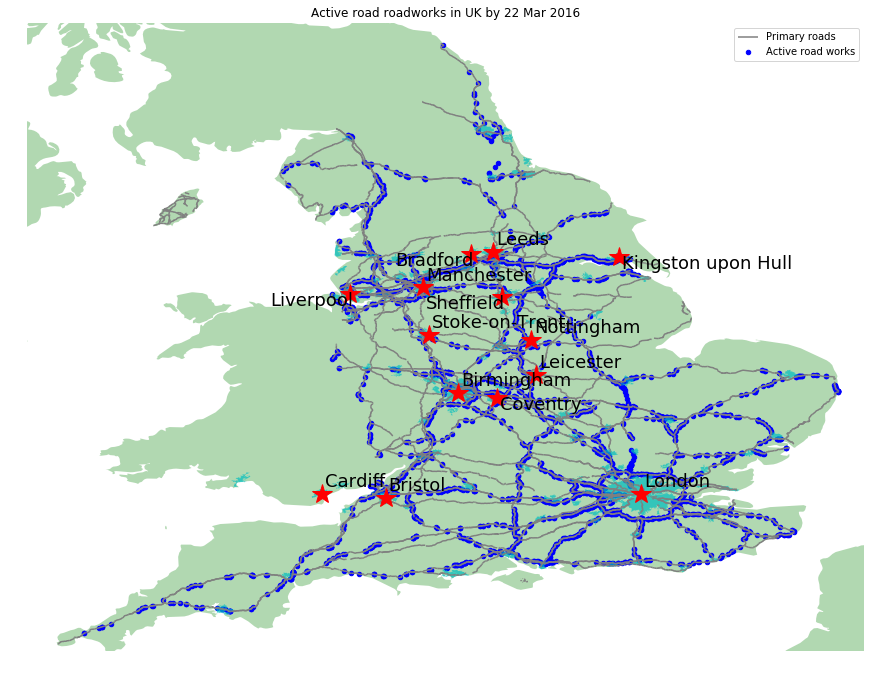

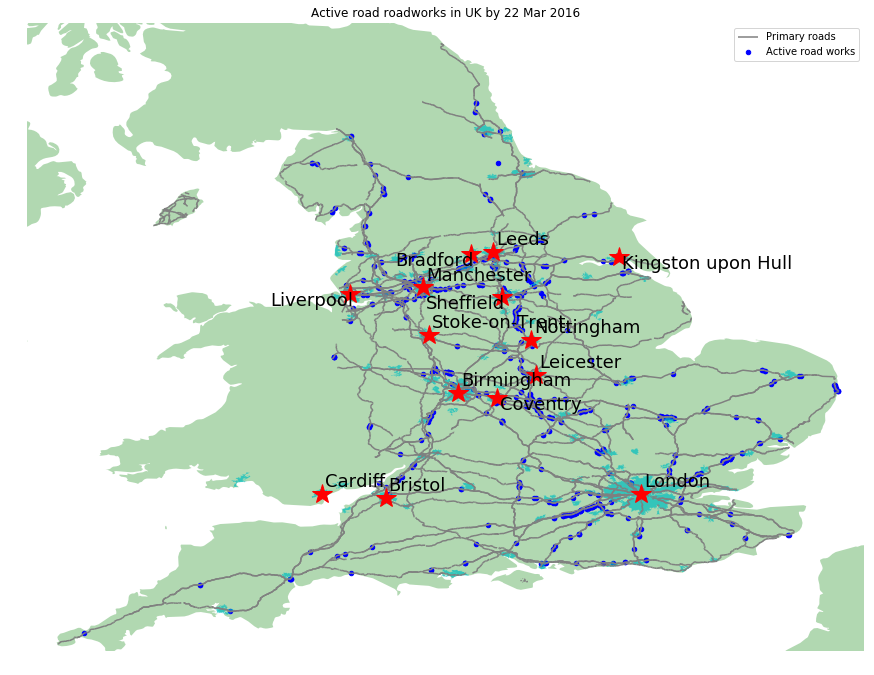

In [107]:

def plot_map(data,name):
    # TODO: add comment here
    # Plots nice plots for final report
    
    import geopandas as gp
    import matplotlib.pyplot as plt
    from pyproj import Proj, transform
    from shapely.geometry import Point, Polygon
    
    roadsMap2=gp.read_file('./geodata/slim_roads.shp')
    cont=gp.read_file('./geodata/ne_10m_admin_0_countries.shp')
    #cities=pd.read_csv('./GB.csv')
    cities=gp.read_file('./geodata/Major_Towns_and_Cities_December_2015_Boundaries.geojson')


    fig,ax = plt.subplots(figsize = (15,15))

    data_copy=data.copy()

    data_copy[['centre_easting', 'centre_northing']] = data_copy[['centre_easting', 'centre_northing']].astype(float)

    ax.set_xlim([-6,2])
    ax.set_ylim([50,56])

    inProj = Proj(init='epsg:27700')  # projected
    outProj = Proj(init='epsg:4326') # lat/long

    x2,y2 = transform(inProj,outProj,x1,y1, )
    e_n = list(zip(data_copy.centre_easting, data_copy.centre_northing))
    e_n = [ transform(inProj,outProj,x,y) for x,y in e_n ]

    gs = gp.GeoSeries([Point(pnt[0],pnt[1]) for pnt in e_n])
   
    ax.axis('off')    

    start_max = data_copy.loc[data_copy['start_date'].idxmax()]['start_date']
    ax.set_title('Active road roadworks in UK by '+str('22 Mar 2016'))
    
    cont.plot(ax=ax, alpha=0.3, color = 'g')
    roadsMap2.plot(ax = ax, alpha=1.0, color='grey', label = 'Primary roads')
    gs.plot(ax=ax, marker='o', color='blue', markersize=20, label = 'Active road works')
    
    cities['geometry'].plot(ax=ax, alpha=0.7, color = 'c', label = 'Populated areas')
    
    import seaborn as sns
    sns.set_palette(sns.color_palette("hls", 20))
    
    # Adding large cities points
    plot_data = zip(cities.geometry.centroid.x, cities.geometry.centroid.y,
        cities.tcity15nm, cities.st_areashape)
    for i, p  in enumerate(plot_data):
        x, y, n, s = p
        if s > 6.00e+07:
            ax.plot(x,y, markersize = 20, marker='*', color='r') 
            if i%2: 
                ha='left'
                va='bottom'
            else:
                ha='right'
                va='top'
            # I was running out of time...
            # I did my best to avoid it
            if n == 'Coventry':
                va='top'
            if n == 'Kingston upon Hull':
                ha='left'
            if n == 'Stroke-on-Trent':
                ha='left'
                va='top'
            if n == 'Notingham':
                ha='left'
                va='bottom'
            ax.annotate(n, xy=(x,y), xytext=(3, 3), horizontalalignment=ha,
                        verticalalignment=va, textcoords="offset points", fontsize = 18)
            
    
    
                       #annotate(label, xy=(x,y), xytext=(3, 3), textcoords="offset points", fontsize = 20)
    ax.legend(loc='upper right')    
    cities
    
    fig.savefig(name+'.png', bbox_inches='tight',dpi = 300)

#plot_map(roadWorks,'general')

date_min = datetime.strptime('Mar 25 2016  11:59PM', '%b %d %Y %I:%M%p')
date_max = datetime.strptime('Mar 28 2016  11:59PM', '%b %d %Y %I:%M%p')

plot_map(roadWorks,'general')
plot_map(busyView, 'easter')